In [4]:
import pandas as pd
import numpy as np

In [187]:
df = pd.read_csv('data/sensors.csv')

In [192]:
df['delay'] = list(range(1, 25))
df.head(5)

interval sensor axis  reading  delay
0         0  accel    Z      0.0      1
1         0  accel    Y      0.5      2
2         0  accel    X      1.0      3
3         1  accel    Z      0.1      4
4         1  accel    Y      0.4      5

In [193]:
df.shape

(24, 5)

In [194]:
df.columns

Index(['interval', 'sensor', 'axis', 'reading', 'delay'], dtype='object')

# Pandas Grouping and Aggregating

`groupby()`
`pd.cut()`
`pd.Grouper()`
`agg()`

## Groupby

In [231]:
# the object represents an interim description of the grouping that will eventually be performed

df.groupby(['sensor'])

In [230]:
# quantity of groups

df.groupby(['sensor']).ngroups

2

In [232]:
# the groups property returns a Python dictionary whose keys represent the names of each group
# the values in the dictionary are an array of the index labels contained within each respective group

df.groupby(['sensor']).groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

In [233]:
# accessing the result of a grouping

def print_groups(grouped_obj):
    for name, group in grouped_obj:
        print(name)
        print(group)
        
print_groups(df.groupby(['sensor']))

accel
    interval sensor axis  reading  delay
0          0  accel    Z      0.0      1
1          0  accel    Y      0.5      2
2          0  accel    X      1.0      3
3          1  accel    Z      0.1      4
4          1  accel    Y      0.4      5
5          1  accel    X      0.9      6
6          2  accel    Z      0.2      7
7          2  accel    Y      0.3      8
8          2  accel    X      0.8      9
9          3  accel    Z      0.3     10
10         3  accel    Y      0.2     11
11         3  accel    X      0.7     12
orientation
    interval       sensor axis  reading  delay
12         0  orientation    Z      0.0     13
13         0  orientation    Y      0.1     14
14         0  orientation    X      0.0     15
15         1  orientation    Z      0.0     16
16         1  orientation    Y      0.2     17
17         1  orientation    X      0.1     18
18         2  orientation    Z      0.0     19
19         2  orientation    Y      0.3     20
20         2  orientation 

In [234]:
# a summary of the size of all the groups

df.groupby(['sensor']).size()

sensor
accel          12
orientation    12
dtype: int64

In [235]:
# the number of items in each column of every group (include only non-null values)

df.groupby(['sensor']).count()

interval  axis  reading  delay
sensor                                     
accel              12    12       12     12
orientation        12    12       12     12

In [236]:
# get the first row in each group

df.groupby(['sensor']).first()

interval axis  reading  delay
sensor                                    
accel               0    Z      0.0      1
orientation         0    Z      0.0     13

In [237]:
# get the last row in each group

df.groupby(['sensor']).last()

interval axis  reading  delay
sensor                                    
accel               3    X      0.7     12
orientation         3    X      0.3     24

In [238]:
# get a specific group by name

df.groupby(['sensor']).get_group('accel')

interval sensor axis  reading  delay
0          0  accel    Z      0.0      1
1          0  accel    Y      0.5      2
2          0  accel    X      1.0      3
3          1  accel    Z      0.1      4
4          1  accel    Y      0.4      5
5          1  accel    X      0.9      6
6          2  accel    Z      0.2      7
7          2  accel    Y      0.3      8
8          2  accel    X      0.8      9
9          3  accel    Z      0.3     10
10         3  accel    Y      0.2     11
11         3  accel    X      0.7     12

In [239]:
# return the specified number of items in each group

print(df.groupby(['sensor']).head(3))
print(df.groupby(['sensor']).tail(3))

    interval       sensor axis  reading  delay
0          0        accel    Z      0.0      1
1          0        accel    Y      0.5      2
2          0        accel    X      1.0      3
12         0  orientation    Z      0.0     13
13         0  orientation    Y      0.1     14
14         0  orientation    X      0.0     15
    interval       sensor axis  reading  delay
9          3        accel    Z      0.3     10
10         3        accel    Y      0.2     11
11         3        accel    X      0.7     12
21         3  orientation    Z      0.0     22
22         3  orientation    Y      0.4     23
23         3  orientation    X      0.3     24


In [240]:
# return the n-th item in each group

df.groupby(['sensor']).nth(2)

interval axis  reading  delay
sensor                                    
accel               0    X      1.0      3
orientation         0    X      0.0     15

In [241]:
# get the descriptive statistics

df.groupby(['sensor']).describe()

interval                                           reading  \
               count mean       std  min   25%  50%   75%  max   count   
sensor                                                                   
accel           12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   
orientation     12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   

                       ...             delay                               \
                 mean  ...    75%  max count  mean       std   min    25%   
sensor                 ...                                                  
accel        0.450000  ...  0.725  1.0  12.0   6.5  3.605551   1.0   3.75   
orientation  0.133333  ...  0.225  0.4  12.0  18.5  3.605551  13.0  15.75   

                                
              50%    75%   max  
sensor                          
accel         6.5   9.25  12.0  
orientation  18.5  21.25  24.0  

[2 rows x 24 columns]

In [242]:
# show unique values using for grouping

df.groupby(['sensor']).groups.keys()

dict_keys(['accel', 'orientation'])

### Grouping using multiple columns

In [243]:
print_groups(df.groupby(['sensor', 'interval']))

('accel', 0)
   interval sensor axis  reading  delay
0         0  accel    Z      0.0      1
1         0  accel    Y      0.5      2
2         0  accel    X      1.0      3
('accel', 1)
   interval sensor axis  reading  delay
3         1  accel    Z      0.1      4
4         1  accel    Y      0.4      5
5         1  accel    X      0.9      6
('accel', 2)
   interval sensor axis  reading  delay
6         2  accel    Z      0.2      7
7         2  accel    Y      0.3      8
8         2  accel    X      0.8      9
('accel', 3)
    interval sensor axis  reading  delay
9          3  accel    Z      0.3     10
10         3  accel    Y      0.2     11
11         3  accel    X      0.7     12
('orientation', 0)
    interval       sensor axis  reading  delay
12         0  orientation    Z      0.0     13
13         0  orientation    Y      0.1     14
14         0  orientation    X      0.0     15
('orientation', 1)
    interval       sensor axis  reading  delay
15         1  orientation    Z 

In [244]:
df.groupby(['sensor', 'interval']).groups.keys()

dict_keys([('accel', 0), ('accel', 1), ('accel', 2), ('accel', 3), ('orientation', 0), ('orientation', 1), ('orientation', 2), ('orientation', 3)])

### Grouping using index levels

In [252]:
df2 = df.copy()
df2 = df2.set_index(['sensor', 'axis'])
df2

interval  reading  delay
sensor      axis                          
accel       Z            0      0.0      1
            Y            0      0.5      2
            X            0      1.0      3
            Z            1      0.1      4
            Y            1      0.4      5
            X            1      0.9      6
            Z            2      0.2      7
            Y            2      0.3      8
            X            2      0.8      9
            Z            3      0.3     10
            Y            3      0.2     11
            X            3      0.7     12
orientation Z            0      0.0     13
            Y            0      0.1     14
            X            0      0.0     15
            Z            1      0.0     16
            Y            1      0.2     17
            X            1      0.1     18
            Z            2      0.0     19
            Y            2      0.3     20
            X            2      0.2     21
            Z            3      0.0     22
            Y            3      0.4     23
            X            3      0.3     24

In [253]:
# group by the first level of the index

print_groups(df2.groupby(level=0))

accel
             interval  reading  delay
sensor axis                          
accel  Z            0      0.0      1
       Y            0      0.5      2
       X            0      1.0      3
       Z            1      0.1      4
       Y            1      0.4      5
       X            1      0.9      6
       Z            2      0.2      7
       Y            2      0.3      8
       X            2      0.8      9
       Z            3      0.3     10
       Y            3      0.2     11
       X            3      0.7     12
orientation
                  interval  reading  delay
sensor      axis                          
orientation Z            0      0.0     13
            Y            0      0.1     14
            X            0      0.0     15
            Z            1      0.0     16
            Y            1      0.2     17
            X            1      0.1     18
            Z            2      0.0     19
            Y            2      0.3     20
            X       

In [254]:
# group by multiple levels of the index

print_groups(df2.groupby(level=['sensor', 'axis']))

('accel', 'X')
             interval  reading  delay
sensor axis                          
accel  X            0      1.0      3
       X            1      0.9      6
       X            2      0.8      9
       X            3      0.7     12
('accel', 'Y')
             interval  reading  delay
sensor axis                          
accel  Y            0      0.5      2
       Y            1      0.4      5
       Y            2      0.3      8
       Y            3      0.2     11
('accel', 'Z')
             interval  reading  delay
sensor axis                          
accel  Z            0      0.0      1
       Z            1      0.1      4
       Z            2      0.2      7
       Z            3      0.3     10
('orientation', 'X')
                  interval  reading  delay
sensor      axis                          
orientation X            0      0.0     15
            X            1      0.1     18
            X            2      0.2     21
            X            3      0.3

## Applying aggregate functions

In [255]:
df2.groupby(level=['sensor', 'axis']).agg(np.mean)

interval  reading  delay
sensor      axis                          
accel       X          1.5     0.85    7.5
            Y          1.5     0.35    6.5
            Z          1.5     0.15    5.5
orientation X          1.5     0.15   19.5
            Y          1.5     0.25   18.5
            Z          1.5     0.00   17.5

In [256]:
# many aggregation functions are built in directly to the GroupBy object

df2.groupby(level=['sensor', 'axis']).mean()

interval  reading  delay
sensor      axis                          
accel       X          1.5     0.85    7.5
            Y          1.5     0.35    6.5
            Z          1.5     0.15    5.5
orientation X          1.5     0.15   19.5
            Y          1.5     0.25   18.5
            Z          1.5     0.00   17.5

In [257]:
df2.groupby(level=['sensor', 'axis']).min()

interval  reading  delay
sensor      axis                          
accel       X            0      0.7      3
            Y            0      0.2      2
            Z            0      0.0      1
orientation X            0      0.0     15
            Y            0      0.1     14
            Z            0      0.0     13

In [258]:
df2.groupby(level=['sensor', 'axis']).max()

interval  reading  delay
sensor      axis                          
accel       X            3      1.0     12
            Y            3      0.5     11
            Z            3      0.3     10
orientation X            3      0.3     24
            Y            3      0.4     23
            Z            3      0.0     22

In [259]:
df2.groupby(level=['sensor', 'axis']).sum()

interval  reading  delay
sensor      axis                          
accel       X            6      3.4     30
            Y            6      1.4     26
            Z            6      0.6     22
orientation X            6      0.6     78
            Y            6      1.0     74
            Z            6      0.0     70

### Applying multiple aggregating functions

In [260]:
# several functions to all columns

df2.agg([np.sum, np.std])

interval   reading       delay
sum  36.00000  7.000000  300.000000
std   1.14208  0.296232    7.071068

In [261]:
# applying same functions to several columns

df[['interval', 'delay']].agg('sum')

interval     36
delay       300
dtype: int64

In [265]:
# different functions to different columns

df.groupby(['sensor', 'axis']).agg({
    'interval': len,
    'reading': np.mean
})

interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [268]:
# several functions to same column

df.groupby(['sensor', 'axis']).agg({'reading': ['min', 'mean', 'max']})

reading           
                     min  mean  max
sensor      axis                   
accel       X        0.7  0.85  1.0
            Y        0.2  0.35  0.5
            Z        0.0  0.15  0.3
orientation X        0.0  0.15  0.3
            Y        0.1  0.25  0.4
            Z        0.0  0.00  0.0

In [269]:
# different functions to different columns with castomized columns names

df.groupby(['sensor', 'axis']).agg(read_min=('reading', 'min'), int_min=('interval', 'min'))

read_min  int_min
sensor      axis                   
accel       X          0.7        0
            Y          0.2        0
            Z          0.0        0
orientation X          0.0        0
            Y          0.1        0
            Z          0.0        0

### Applying lambda-functions

In [270]:
df.groupby(['sensor', 'axis']).agg(lambda x: x.to_list())

interval               reading             delay
sensor      axis                                                      
accel       X     [0, 1, 2, 3]  [1.0, 0.9, 0.8, 0.7]     [3, 6, 9, 12]
            Y     [0, 1, 2, 3]  [0.5, 0.4, 0.3, 0.2]     [2, 5, 8, 11]
            Z     [0, 1, 2, 3]  [0.0, 0.1, 0.2, 0.3]     [1, 4, 7, 10]
orientation X     [0, 1, 2, 3]  [0.0, 0.1, 0.2, 0.3]  [15, 18, 21, 24]
            Y     [0, 1, 2, 3]  [0.1, 0.2, 0.3, 0.4]  [14, 17, 20, 23]
            Z     [0, 1, 2, 3]  [0.0, 0.0, 0.0, 0.0]  [13, 16, 19, 22]

In [276]:
df.groupby('sensor').apply(lambda x: x.axis.to_list())

sensor
accel          [Z, Y, X, Z, Y, X, Z, Y, X, Z, Y, X]
orientation    [Z, Y, X, Z, Y, X, Z, Y, X, Z, Y, X]
dtype: object

In [274]:
# some function to selected columns and another function to other columns

df.groupby('sensor').agg(lambda x: x.sum() if x.name in ['interval', 'reading'] else x.to_list())

interval                                  axis  reading  \
sensor                                                                 
accel              18  [Z, Y, X, Z, Y, X, Z, Y, X, Z, Y, X]      5.4   
orientation        18  [Z, Y, X, Z, Y, X, Z, Y, X, Z, Y, X]      1.6   

                                                        delay  
sensor                                                         
accel                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  
orientation  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

## Transforming groups of data

In [338]:
print_groups(df.groupby('sensor'))

accel
    interval sensor axis  reading  delay
0          0  accel    Z      0.0      1
1          0  accel    Y      0.5      2
2          0  accel    X      1.0      3
3          1  accel    Z      0.1      4
4          1  accel    Y      0.4      5
5          1  accel    X      0.9      6
6          2  accel    Z      0.2      7
7          2  accel    Y      0.3      8
8          2  accel    X      0.8      9
9          3  accel    Z      0.3     10
10         3  accel    Y      0.2     11
11         3  accel    X      0.7     12
orientation
    interval       sensor axis  reading  delay
12         0  orientation    Z      0.0     13
13         0  orientation    Y      0.1     14
14         0  orientation    X      0.0     15
15         1  orientation    Z      0.0     16
16         1  orientation    Y      0.2     17
17         1  orientation    X      0.1     18
18         2  orientation    Z      0.0     19
19         2  orientation    Y      0.3     20
20         2  orientation 

In [339]:
df.groupby('sensor').transform(np.sum)

interval          axis reading delay
0        18  ZYXZYXZYXZYX     5.4    78
1        18  ZYXZYXZYXZYX     5.4    78
2        18  ZYXZYXZYXZYX     5.4    78
3        18  ZYXZYXZYXZYX     5.4    78
4        18  ZYXZYXZYXZYX     5.4    78
5        18  ZYXZYXZYXZYX     5.4    78
6        18  ZYXZYXZYXZYX     5.4    78
7        18  ZYXZYXZYXZYX     5.4    78
8        18  ZYXZYXZYXZYX     5.4    78
9        18  ZYXZYXZYXZYX     5.4    78
10       18  ZYXZYXZYXZYX     5.4    78
11       18  ZYXZYXZYXZYX     5.4    78
12       18  ZYXZYXZYXZYX     1.6   222
13       18  ZYXZYXZYXZYX     1.6   222
14       18  ZYXZYXZYXZYX     1.6   222
15       18  ZYXZYXZYXZYX     1.6   222
16       18  ZYXZYXZYXZYX     1.6   222
17       18  ZYXZYXZYXZYX     1.6   222
18       18  ZYXZYXZYXZYX     1.6   222
19       18  ZYXZYXZYXZYX     1.6   222
20       18  ZYXZYXZYXZYX     1.6   222
21       18  ZYXZYXZYXZYX     1.6   222
22       18  ZYXZYXZYXZYX     1.6   222
23       18  ZYXZYXZYXZYX     1.6   222

In [340]:
df['avg_delay'] = df.groupby('sensor').delay.transform('mean')
df

interval       sensor axis  reading  delay  avg_delay
0          0        accel    Z      0.0      1        6.5
1          0        accel    Y      0.5      2        6.5
2          0        accel    X      1.0      3        6.5
3          1        accel    Z      0.1      4        6.5
4          1        accel    Y      0.4      5        6.5
5          1        accel    X      0.9      6        6.5
6          2        accel    Z      0.2      7        6.5
7          2        accel    Y      0.3      8        6.5
8          2        accel    X      0.8      9        6.5
9          3        accel    Z      0.3     10        6.5
10         3        accel    Y      0.2     11        6.5
11         3        accel    X      0.7     12        6.5
12         0  orientation    Z      0.0     13       18.5
13         0  orientation    Y      0.1     14       18.5
14         0  orientation    X      0.0     15       18.5
15         1  orientation    Z      0.0     16       18.5
16         1  orientation    Y      0.2     17       18.5
17         1  orientation    X      0.1     18       18.5
18         2  orientation    Z      0.0     19       18.5
19         2  orientation    Y      0.3     20       18.5
20         2  orientation    X      0.2     21       18.5
21         3  orientation    Z      0.0     22       18.5
22         3  orientation    Y      0.4     23       18.5
23         3  orientation    X      0.3     24       18.5

### Filling missing values with the mean of the group

A common transformation in statistical analysis with grouped data is to replace missing data within each group
with the mean of the non- NaN values in the group.

In [343]:
df_t = pd.DataFrame({'Label': list('ABABAB'),
                     'Values': [10, 20, np.nan, np.nan, 12, 22]})
print_groups(df_t.groupby('Label'))

A
  Label  Values
0     A    10.0
2     A     NaN
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [344]:
df_t.groupby('Label').transform(lambda x: x.fillna(x.mean()))

Values
0    10.0
1    20.0
2    11.0
3    21.0
4    12.0
5    22.0

### Calculating normalized z-scores with a transformation

In [347]:
np.random.seed(123456)
s_z = pd.Series(np.random.normal(0.5, 2, 365*3),
                pd.date_range('2013-1-1', periods=365*3))
rolling = s_z.rolling(
            window=100,
            min_periods=100,
            center=False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

<AxesSubplot:>

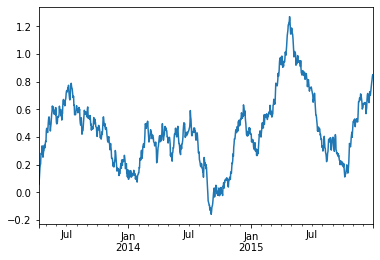

In [348]:
rolling.plot()

In [353]:
# standardize the rolling means for each calendar year

rolling.groupby(rolling.index.year).agg([np.mean, np.std])

mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

In [354]:
# another way
rolling.groupby(lambda x: x.year).agg([np.mean, np.std])

mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

In [356]:
# normalize to z-score

normalized = rolling.groupby(rolling.index.year).transform(lambda x: (x - x.mean()) / x.std())
normalized[:5]

2013-04-10   -2.213125
2013-04-11   -2.307837
2013-04-12   -2.122115
2013-04-13   -1.866325
2013-04-14   -1.618471
Freq: D, dtype: float64

In [357]:
normalized.groupby(normalized.index.year).agg([np.mean, np.std])

mean  std
2013  5.434250e-16  1.0
2014 -1.747156e-15  1.0
2015  7.239262e-16  1.0

<AxesSubplot:>

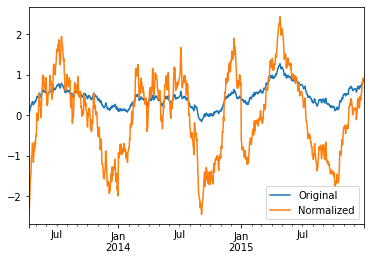

In [358]:
compared = pd.DataFrame({'Original': rolling,
                         'Normalized': normalized})
compared.plot()

## Filtering groups from aggregation

In [365]:
df_f = df_t.copy()
df_f['Label'] = list('AAABCC')
df_f

Label  Values
0     A    10.0
1     A    20.0
2     A     NaN
3     B     NaN
4     C    12.0
5     C    22.0

In [366]:
# drop groups that only have one item or less

df_f.groupby('Label').filter(lambda x: x.Values.count() > 1)

Label  Values
0     A    10.0
1     A    20.0
2     A     NaN
4     C    12.0
5     C    22.0

In [367]:
# omit groups that have any NaN values

df_f.groupby('Label').filter(lambda x: x.Values.isnull().sum() == 0)

Label  Values
4     C    12.0
5     C    22.0

In [376]:
# select groups that have a mean that is greater than 2.0, the mean of the entire data set

grouped = df_t.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 4.0
df_t.groupby('Label').filter(f)

Label  Values
0     A    10.0
1     B    20.0
2     A     NaN
3     B     NaN
4     A    12.0
5     B    22.0

In [378]:
college_df = pd.read_csv('data/college.csv', index_col='INSTNM')
college_df.head(3)

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                  
Alabama A & M University                 Normal     AL   1.0      0.0   
University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
Amridge University                   Montgomery     AL   0.0      0.0   

                                     WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                         
Alabama A & M University                   0.0         0     424.0     420.0   
University of Alabama at Birmingham        0.0         0     570.0     565.0   
Amridge University                         0.0         1       NaN       NaN   

                                     DISTANCEONLY     UGDS  ...  UGDS_2MOR  \
INSTNM                                                      ...              
Alabama A & M University                      0.0   4206.0  ...     0.0000   
University of Alabama at Birmingham           0.0  11383.0  ...     0.0368   
Amridge University                            1.0    291.0  ...     0.0000   

                                     UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  \
INSTNM                                                                         
Alabama A & M University               0.0059     0.0138    0.0656         1   
University of Alabama at Birmingham    0.0179     0.0100    0.2607         1   
Amridge University                     0.0000     0.2715    0.4536         1   

                                     PCTPELL  PCTFLOAN  UG25ABV  \
INSTNM                                                            
Alabama A & M University              0.7356    0.8284   0.1049   
University of Alabama at Birmingham   0.3460    0.5214   0.2422   
Amridge University                    0.6801    0.7795   0.8540   

                                     MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
INSTNM                                                                    
Alabama A & M University                       30300               33888  
University of Alabama at Birmingham            39700             21941.5  
Amridge University                             40100               23370  

[3 rows x 26 columns]

In [379]:
# group by state, and display the total number of groups

grouped = college_df.groupby('STABBR')
grouped.ngroups

59

In [380]:
college_df.STABBR.nunique()

59

In [381]:
# Let's define a function that calculates the total percentage of minority students and returns
# True if this percentage is greater than a user-defined threshold

def check_minority(df, threshold):
    minority_pct = 1 - df['UGDS_WHITE']
    total_minority = (df['UGDS'] * minority_pct).sum()
    total_ugds = df['UGDS'].sum()
    total_minority_pct = total_minority / total_ugds
    return total_minority_pct > threshold

In [383]:
# find all states that have a minority majority

college_filtered = grouped.filter(check_minority, threshold=0.5)
college_filtered.head(5)

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                    
Everest College-Phoenix                   Phoenix     AZ   0.0      0.0   
Collins College                           Phoenix     AZ   0.0      0.0   
Empire Beauty School-Paradise Valley      Phoenix     AZ   0.0      0.0   
Empire Beauty School-Tucson                Tucson     AZ   0.0      0.0   
Thunderbird School of Global Management  Glendale     AZ   0.0      0.0   

                                         WOMENONLY  RELAFFIL  SATVRMID  \
INSTNM                                                                   
Everest College-Phoenix                        0.0         1       NaN   
Collins College                                0.0         0       NaN   
Empire Beauty School-Paradise Valley           0.0         1       NaN   
Empire Beauty School-Tucson                    0.0         0       NaN   
Thunderbird School of Global Management        0.0         0       NaN   

                                         SATMTMID  DISTANCEONLY    UGDS  ...  \
INSTNM                                                                   ...   
Everest College-Phoenix                       NaN           0.0  4102.0  ...   
Collins College                               NaN           0.0    83.0  ...   
Empire Beauty School-Paradise Valley          NaN           0.0    25.0  ...   
Empire Beauty School-Tucson                   NaN           0.0   126.0  ...   
Thunderbird School of Global Management       NaN           0.0     1.0  ...   

                                         UGDS_2MOR  UGDS_NRA  UGDS_UNKN  \
INSTNM                                                                    
Everest College-Phoenix                     0.0373       0.0     0.1026   
Collins College                             0.0241       0.0     0.3855   
Empire Beauty School-Paradise Valley        0.0400       0.0     0.0000   
Empire Beauty School-Tucson                 0.0000       0.0     0.0079   
Thunderbird School of Global Management     0.0000       0.0     0.0000   

                                         PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                 
Everest College-Phoenix                    0.4749         0   0.8291   
Collins College                            0.3373         0   0.7205   
Empire Beauty School-Paradise Valley       0.1600         0   0.6349   
Empire Beauty School-Tucson                0.2222         1   0.7962   
Thunderbird School of Global Management    1.0000         0   0.0000   

                                         PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                        
Everest College-Phoenix                    0.7151   0.6700            28600   
Collins College                            0.8228   0.4764            25700   
Empire Beauty School-Paradise Valley       0.5873   0.4651            17800   
Empire Beauty School-Tucson                0.6615   0.4229            18200   
Thunderbird School of Global Management    0.0000   0.0000           118900   

                                         GRAD_DEBT_MDN_SUPP  
INSTNM                                                       
Everest College-Phoenix                                9500  
Collins College                                       47000  
Empire Beauty School-Paradise Valley                   9588  
Empire Beauty School-Tucson                            9833  
Thunderbird School of Global Management   PrivacySuppressed  

[5 rows x 26 columns]

In [384]:
print(college_df.shape)
print(college_filtered.shape)
college_filtered.STABBR.nunique()

(7535, 26)
(3028, 26)


20